In [1]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'savefig.dpi':300, 'axes.labelweight':'normal'})
matplotlib.rcParams['axes.linewidth'] = 0.8

import os
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ['PATH']

from matplotlib import rc
preamble = r'''
\usepackage{physics} \usepackage{upgreek} \usepackage{mhchem} \usepackage{bm}
'''
import matplotlib.colors as colors
plt.rc('text.latex', preamble=preamble)
rc('text', usetex=True)

import numpy as np
import scipy, os
import seaborn as sns
import scipy.linalg as LA
import time
from numba import prange 

def colorFader(c1, c2, mix=0.5):
    c1 = np.array(matplotlib.colors.to_rgb(c1))
    c2 = np.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

os.chdir('/Users/ana/Desktop/ta2nise5')

from tokovi_drugic import * 
from helpers import *
from tnsmodule import * 

from scipy.optimize import curve_fit

U = 2.5 # eV
V = 0.785 # eV
a = 3.51 # A
b = 15.79 # A
b2 = 1.927 # A

In [2]:
dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 2000, 200, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters1 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]

dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 500, 100, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters2 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]


Nk = 30
Ny, Nx = Nk, Nk
mu = 2.84
eps0 = 0.1

n_target = 2.02
s = TNS(a, b, b2, Ny, Nx, U, V, mu, parameters1, parameters2, eps0, n_target)

In [ ]:
dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 2000, 200, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters1 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]

dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 500, 100, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters2 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]


Nk = 30
Ny, Nx = Nk, Nk
mu = 2.84
eps0 = 0.1

n_target = 2.01
s = TNS(a, b, b2, Ny, Nx, U, V, mu, parameters1, parameters2, eps0, n_target)
mu = 0.5*(np.max(s.energije[1]) + np.min(s.energije[2]))
s = TNS(a, b, b2, Ny, Nx, U, V, mu, parameters1, parameters2, eps0, n_target)
beta0 = 300
scale = 1.005
betas = beta0/scale**np.arange(1,100,3)
stops = [int(np.emath.logn(scale, beta0/beta)) for beta in betas]
Ts = 1/betas

eps = 1e-5
Nomega = 501
kb = 8.6 * 1e-5
Gamma = 0.001
s.run2(betas, stops, Gamma, eps, Nomega)
plt.plot(s.Ts, s.mus, '.-', label=Nk)


started evaluating at beta=298.5074626865672


/Users/ana/Desktop/ta2nise5/helpers.py:107: RuntimeWarning: overflow encountered in exp
  np.fill_diagonal(fs[:, :, 0, n], 1/(1 + np.exp((en - mu)/T)))
/Users/ana/Desktop/ta2nise5/helpers.py:116: RuntimeWarning: overflow encountered in exp
  np.fill_diagonal(fs[:, :, Ny//2, n], 1/(1 + np.exp((en - mu)/T)))
/Users/ana/Desktop/ta2nise5/helpers.py:126: RuntimeWarning: overflow encountered in exp
  np.fill_diagonal(fs[:, :, m, 0], 1/(1 + np.exp((en - mu)/T)))
/Users/ana/Desktop/ta2nise5/helpers.py:151: RuntimeWarning: overflow encountered in exp
  np.fill_diagonal(fs[:, :, m, n], 1/(1 + np.exp((en - mu)/T)))
/Users/ana/Desktop/ta2nise5/helpers.py:152: RuntimeWarning: overflow encountered in exp
  np.fill_diagonal(fs[:, :, -m, -n], 1/(1 + np.exp((en - mu)/T)))
/Users/ana/Desktop/ta2nise5/helpers.py:166: RuntimeWarning: overflow encountered in exp
  np.fill_diagonal(fs[:, :, m, n + Nx//2], 1/(1 + np.exp((en - mu)/T)))
/Users/ana/Desktop/ta2nise5/helpers.py:167: RuntimeWarning: overflow encou

In [4]:
s.occupations

[np.float64(1.999999999999998),
 np.float64(1.9999999999999967),
 np.float64(1.9999999999999964),
 np.float64(1.9999999999999898),
 np.float64(1.9999999999999738),
 np.float64(1.999999999999931),
 np.float64(1.9999999999998266),
 np.float64(1.9999999999996447),
 np.float64(1.9999999999991847),
 np.float64(1.99999999999813),
 np.float64(1.999999999995005)]

(5.0, 300.0)

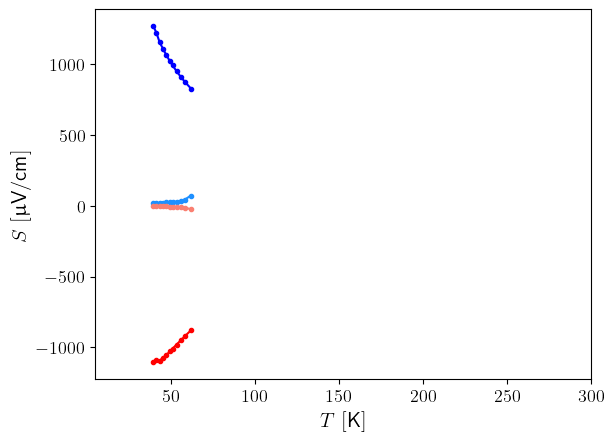

In [98]:

plt.plot(np.array(s.Ts)/kb , kb * 1e6 * np.array(s.Seebeck_By), '.-', color='blue', label='Boltzmann y')
plt.plot(np.array(s.Ts)/kb , kb * 1e6 * np.array(s.Seebeck_Ky), '.-', color='dodgerblue', label='Kubo y')

plt.plot(np.array(s.Ts)/kb , kb * 1e6 * np.array(s.Seebeck_Bx), '.-', color='red', label='Boltzmann x')
plt.plot(np.array(s.Ts)/kb , kb * 1e6 * np.array(s.Seebeck_Kx), '.-', color='salmon', label='Kubo x')


plt.xlabel(r'$T\,\,[\text{K}]$', fontsize=15)
plt.ylabel(r'$S\,\,[\upmu\text{V/cm}]$', fontsize=15)
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
plt.xlim(5,300)

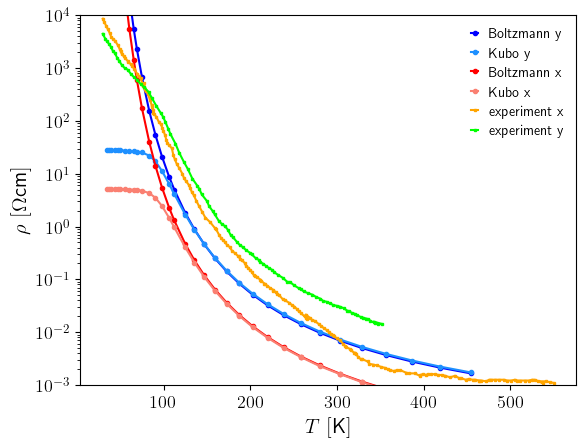

(-3.0, 10000.0)

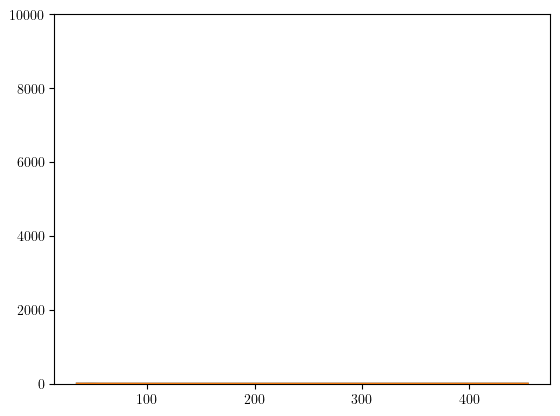

In [53]:
kb = 8.6 * 1e-5
faktor = 1.#328 / 1210
plt.plot(np.array(s.Ts)/kb * faktor, s.RhoB_y, '.-', color='blue', label='Boltzmann y')
plt.plot(np.array(s.Ts)/kb * faktor, s.RhoK_y, '.-', color='dodgerblue', label='Kubo y')

plt.plot(np.array(s.Ts)/kb * faktor , s.RhoB_x, '.-', color='red', label='Boltzmann x')
plt.plot(np.array(s.Ts)/kb * faktor , s.RhoK_x, '.-', color='salmon', label='Kubo x')
plt.yscale('log')

plt.xlabel(r'$T\,\,[\text{K}]$', fontsize=15)
plt.ylabel(r'$\rho\,\,[\Omega\text{cm}]$', fontsize=15)
plt.xticks(fontsize=13),plt.yticks(fontsize=13)


os.chdir('/Users/ana/Desktop/ta2nise5/')
rhox_data = np.genfromtxt('rho_x_data.txt')
rhoy_data = np.genfromtxt('rho_y_data.txt')
plt.plot(rhox_data[:,0], 10**rhox_data[:,1], 's-', ms=2, color='orange', label='experiment x')
plt.plot(rhoy_data[:,0], 10**rhoy_data[:,1], 's-', ms=2, color='lime', label='experiment y')
plt.legend(frameon=False, handlelength=0.5)
plt.ylim(1e-3,1e4)
plt.show()
plt.plot(np.array(s.Ts)/kb * faktor, np.array(s.RhoB_y)/np.array(s.RhoB_x))
plt.plot(np.array(s.Ts)/kb * faktor, np.array(s.RhoK_y)/np.array(s.RhoK_x))
plt.ylim(-3,1e4)

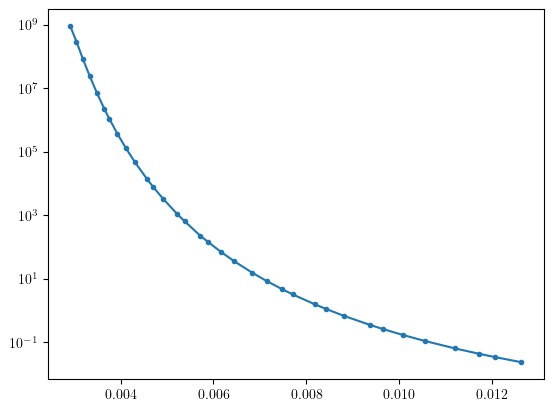

In [ ]:
plt.plot(np.array(s.Ts) / kb, s.RhoB_x, '.-')
plt.yscale('log')

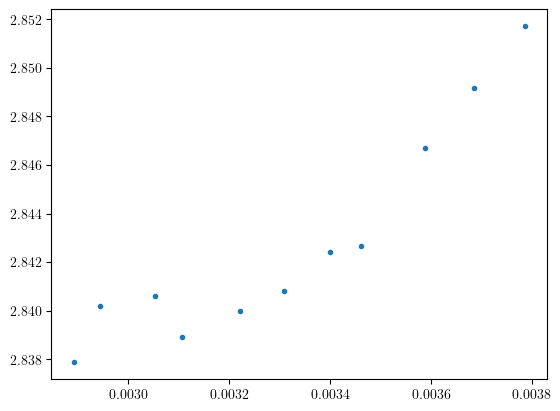

In [10]:
plt.plot(s.Ts, s.mus, '.')

In [18]:
np.save(f'RhoB_x_{Nx}.npy', s.RhoB_x)
np.save(f'RhoK_x_{Nx}.npy', s.RhoK_x)
np.save(f'RhoB_y_{Nx}.npy', s.RhoB_y)
np.save(f'RhoK_y_{Nx}.npy', s.RhoK_y)
np.save(f'Ts_{Nx}.npy', s.Ts)
np.save(f'occupations_{Nx}.npy', s.occupations)
np.save(f'phis_{Nx}.npy', s.phis)
np.save(f'errors_{Nx}.npy', s.errors)

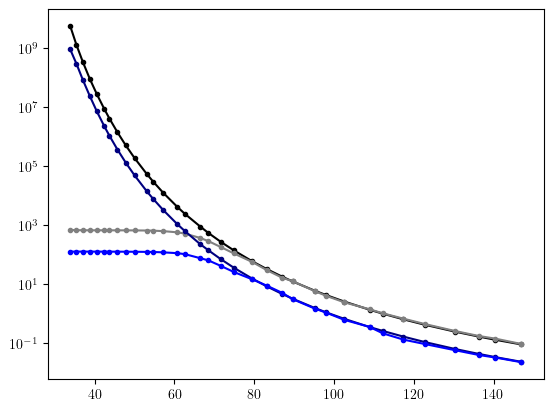

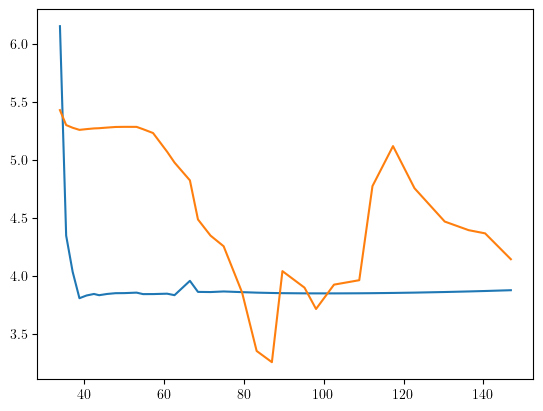

In [19]:
kb = 8.6 * 1e-5
plt.plot(np.array(s.Ts)/kb, s.RhoB_y, '.-', color='black')
plt.plot(np.array(s.Ts)/kb, s.RhoK_y, '.-', color='grey')

plt.plot(np.array(s.Ts)/kb, s.RhoB_x, '.-', color='navy')
plt.plot(np.array(s.Ts)/kb, s.RhoK_x, '.-', color='blue')
plt.yscale('log')
plt.show()
plt.plot(np.array(s.Ts)/kb, np.array(s.RhoB_y)/np.array(s.RhoB_x))
plt.plot(np.array(s.Ts)/kb, np.array(s.RhoK_y)/np.array(s.RhoK_x))

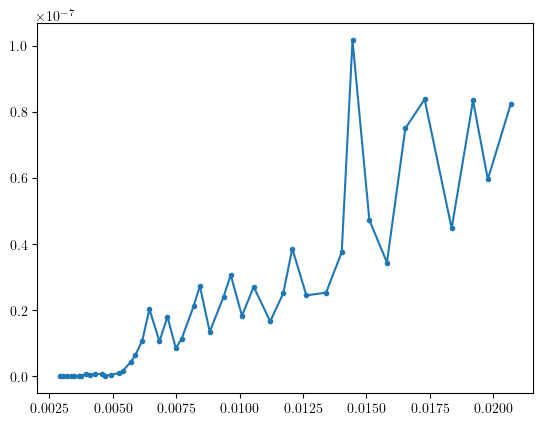

In [36]:
plt.plot(s.Ts, s.errors, '.-')

In [67]:
vel_x, vel_y = group_velocity(s.kymesh, s.kxmesh, s.energije)
Vel_x = rotate_basis(s.tok[0], s.vecs)
Vel_y = rotate_basis(s.tok[1], s.vecs)

omegas = np.linspace(-0.5,0.5,501)
Gamma = 0.005
phiB = phi_boltzmann(s.kymesh, s.kxmesh, vel_x, vel_y, s.energije, omegas, s.mu, faktor=2.5)
phiK = phi_kubo(s.kymesh, s.kxmesh, Vel_x, Vel_y, s.energije, omegas, s.mu, Gamma)

pos = positions(a, b, b2)
kin = kinetic(extend=True)
inter = interaction()

mat = mf_matrices(s.kymesh, s.kxmesh, s.rho, a, b, U, V, pos, kin, inter)
mat_new = np.zeros(mat.shape, dtype=np.complex128)
for j in range(4):
    for nu in range(2):
        m = rotate_basis(mat[j,nu], s.vecs)
        mat_new[j,nu] = m
mat_new = np.einsum('ijlkxy->jlkxy', mat_new)
 
phiq = phiQ(s.kymesh, s.kxmesh, Vel_x, Vel_y, mat_new[0], mat_new[1], s.energije, omegas, s.mu, Gamma)

In [71]:
phiqx = omegas * phiK[0] + phiq[0]
phiqy = omegas * phiK[1] + phiq[1]

betas = np.linspace(1/900, 1/30, 100)
K1x, K1x_, K1y, K1y_ = [], [], [], []
K0x, K0y = [], []
for i, beta in enumerate(betas):
    K0y.append(np.sum(-fd_1(omegas, 1/beta) * phiK[1]))
    K0x.append(np.sum(-fd_1(omegas, 1/beta) * phiK[0]))
    K1y.append(np.sum(-fd_1(omegas, 1/beta) * phiK[1] * omegas))
    K1x.append(np.sum(-fd_1(omegas, 1/beta) * phiK[0] * omegas))
    K1y_.append(np.sum(-fd_1(omegas, 1/beta) * phiqy))
    K1x_.append(np.sum(-fd_1(omegas, 1/beta) * phiqx))

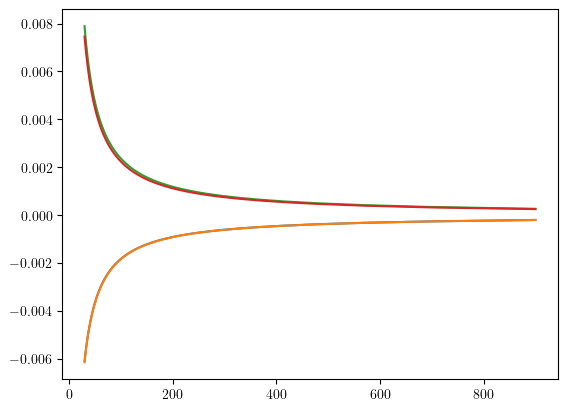

In [72]:
plt.plot(1/betas, - np.array(K1x) / np.array(K0x) * betas)
plt.plot(1/betas, - np.array(K1x_) / np.array(K0x) * betas)

plt.plot(1/betas, - np.array(K1y) / np.array(K0y) * betas)
plt.plot(1/betas, - np.array(K1y_) / np.array(K0y) * betas)

In [73]:
np.sum(phiqy)

np.float64(-1661.697879866524)

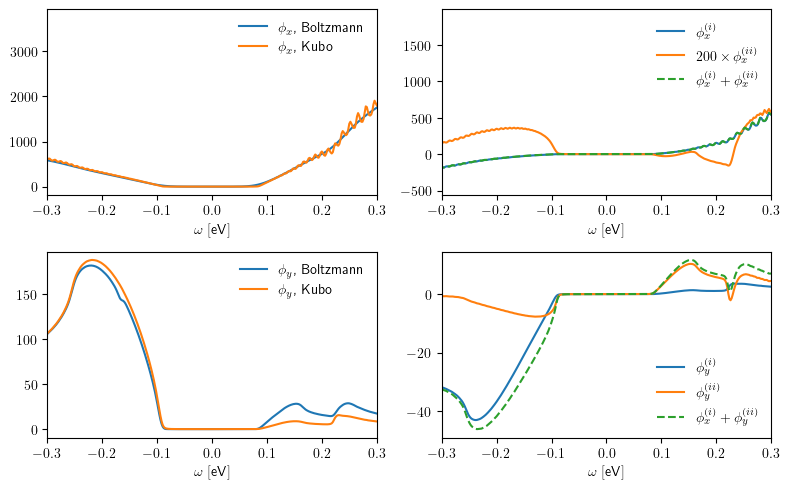

In [74]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8,5))

ax[0,0].plot(omegas, phiB[0] / (2*Gamma), label=r'$\phi_x$, Boltzmann')
ax[0,0].plot(omegas, phiK[0] * np.pi, label=r'$\phi_x$, Kubo')

ax[1,0].plot(omegas, phiB[1] / (2*Gamma), label=r'$\phi_y$, Boltzmann')
ax[1,0].plot(omegas, phiK[1] * np.pi, label=r'$\phi_y$, Kubo')

ax[0,1].plot(omegas, omegas * phiK[0] * np.pi, label=r'$\phi_x^{(i)}$')
ax[0,1].plot(omegas, phiq[0].real * np.pi * 200, label=r'$200\times\phi_x^{(ii)}$')
ax[0,1].plot(omegas, omegas * phiK[0] * np.pi + phiq[0].real * np.pi, ls='dashed', label=r'$\phi_x^{(i)} + \phi_x^{(ii)}$')

ax[1,1].plot(omegas, omegas * phiK[1] * np.pi, label=r'$\phi_y^{(i)}$')
ax[1,1].plot(omegas, phiq[1].real * np.pi, label=r'$\phi_y^{(ii)}$')
ax[1,1].plot(omegas, omegas * phiK[1] * np.pi + phiq[1].real * np.pi, ls='dashed', label=r'$\phi_x^{(i)} + \phi_y^{(ii)}$')

for j in range(2):
    for i in range(2):
        ax[i,j].set_xlabel(r'$\omega\,\,[\text{eV}]$')
        ax[i,j].legend(frameon=False)
        ax[i,j].set_xlim(-0.3,0.3)
plt.tight_layout()
plt.savefig('slika3.pdf')

In [ ]:
beta0 = 500
scale = 1.007

betas = beta0/scale**np.arange(1,100,5)
stops = [int(np.emath.logn(scale, beta0/beta)) for beta in betas]
Ts = 1/betas

eps = 1e-6
Nomega = 501
Gamma = 0.05

s.run2(betas, stops, Gamma, eps, Nomega)
